1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

2 - Brand Choice

In [2]:
df_pa = pd.read_csv("customer-segmented-prepared.csv")
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,3,0,0,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,3,0,0,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,3,0,0,0,1
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,3,0,0,0,1
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,3,0,0,0,1
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,3,0,0,0,1


In [3]:
# Here we are interested in determining the brand choice of the customer.
# Hence, we filter our data, to include only purchase occasion, when a purchase has occured.
brand_choice = df_pa[df_pa['Incidence'] == 1]
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,3,0,0,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,3,0,0,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,3,0,0,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,3,0,0,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,3,0,0,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,3,0,0,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,3,0,0,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,3,0,0,0,1


In [4]:
# Our model will predict the brand.
Y = brand_choice['Brand']
Y

6        2
11       5
19       1
24       4
29       2
        ..
58621    2
58648    1
58674    2
58687    2
58691    2
Name: Brand, Length: 14638, dtype: int64

In [5]:
# We predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]
X

,Price_1,Price_2,Price_3,Price_4,Price_5
6,1.50,1.90,1.99,2.09,2.67
11,1.39,1.90,1.91,2.12,2.62
19,1.47,1.90,1.99,1.97,2.67
24,1.21,1.35,1.99,2.16,2.68
29,1.46,1.88,1.97,1.89,2.37
...,...,...,...,...,...
58621,1.48,1.89,2.01,2.18,2.69
58648,1.35,1.57,2.02,2.21,2.70
58674,1.50,1.85,2.06,2.24,2.79
58687,1.42,1.51,1.97,2.24,2.78


In [6]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(
    solver='sag', multi_class='multinomial')
model_brand_choice.fit(X, Y)
# Multinomial => If the answer is beyond yes/no (0/1) but still within MCQ boundaries (1/2/3/4.../n)

LogisticRegression(multi_class='multinomial', solver='sag')

In [7]:
model_brand_choice.intercept_

array([-2.21363122,  1.51599734, -8.71896529,  3.58535972,  5.83123945])

In [8]:
model_brand_choice.coef_

array([[-3.91593914,  0.65846621,  2.41779294,  0.70409656, -0.20208343],
       [ 1.27462011, -1.87985203, -0.2126181 , -0.20633562,  0.58787935],
       [ 1.62414538,  0.56209149,  0.50072439,  1.03947984,  0.4527336 ],
       [ 0.57454594,  0.39559233, -1.40057477, -1.24623842,  0.24936141],
       [ 0.4426277 ,  0.263702  , -1.30532446, -0.29100236, -1.08789094]])

In [9]:
# We create a pandas data frame, which contains to coefficients.
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915939,0.658466,2.417793,0.704097,-0.202083
1,1.274620,-1.879852,-0.212618,-0.206336,0.587879
2,1.624145,0.562091,0.500724,1.039480,0.452734
3,0.574546,0.395592,-1.400575,-1.246238,0.249361
4,0.442628,0.263702,-1.305324,-0.291002,-1.087891


In [10]:
# We make some transformations on the coefficients data frame to increase readability.
# We transpose the data frame, to keep with the conventional representation of results.
# We add labels for the columns and the index, which represent the coefficients of the brands and prices, respectively.

# bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
# coefficients = ['Coef_Brand_1', 'Coef_Brand_2',
#                 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
# bc_coef.columns = [coefficients]
# prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
# bc_coef.index = [prices]
# bc_coef = bc_coef.round(2)
# bc_coef

In [11]:
brand_choice_coeff = pd.DataFrame(model_brand_choice.coef_)
prices = ['Coeff_Price_1', 'Coeff_Price_2', 'Coeff_Price_3', 'Coeff_Price_4', 'Coeff_Price_5']
brand_choice_coeff.columns = [prices]
coefficients = ['Prob_Brand_1', 'Prob_Brand_2', 'Prob_Brand_3', 'Prob_Brand_4', 'Prob_Brand_5']
brand_choice_coeff.index = [coefficients]
brand_choice_coeff = brand_choice_coeff.round(2)
brand_choice_coeff

,Coeff_Price_1,Coeff_Price_2,Coeff_Price_3,Coeff_Price_4,Coeff_Price_5
Prob_Brand_1,-3.92,0.66,2.42,0.70,-0.20
Prob_Brand_2,1.27,-1.88,-0.21,-0.21,0.59
Prob_Brand_3,1.62,0.56,0.50,1.04,0.45
Prob_Brand_4,0.57,0.40,-1.40,-1.25,0.25
Prob_Brand_5,0.44,0.26,-1.31,-0.29,-1.09


In [12]:
brand_choice_coeff.loc["Prob_Brand_1", :]

,Coeff_Price_1,Coeff_Price_2,Coeff_Price_3,Coeff_Price_4,Coeff_Price_5
Prob_Brand_1,-3.92,0.66,2.42,0.7,-0.2


In [13]:
# log(odds of chosing brand 1) = -3.92*(price of brand 1) + 0.66*(price of brand 2) + 2.42*(price of brand 3) + 
#                                 0.70*(price of brand 4) - 0.20*(price of brand 5)

3 - Own Price Elasticity of Purchase Probability for Brand 5

In [14]:
price_range = np.arange(0.5,3.5,0.01)

In [15]:
# We want to calculate price elasticity of brand choice.
# Here we create a data frame with price columns, which our model will use to predict the brand choice probabilities.
df_own_brand_5 = pd.DataFrame(index = np.arange(300))
# 300 <= (3.5-0.5)/0.01
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean().round(2)
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean().round(2)
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean().round(2)
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean().round(2)
df_own_brand_5['Price_5'] = price_range
df_own_brand_5
# We vary the price of brand 5 to check its elasticity

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.38,1.76,2.01,2.16,0.50
1,1.38,1.76,2.01,2.16,0.51
2,1.38,1.76,2.01,2.16,0.52
3,1.38,1.76,2.01,2.16,0.53
4,1.38,1.76,2.01,2.16,0.54
...,...,...,...,...,...
295,1.38,1.76,2.01,2.16,3.45
296,1.38,1.76,2.01,2.16,3.46
297,1.38,1.76,2.01,2.16,3.47
298,1.38,1.76,2.01,2.16,3.48


In [16]:
# Brand Choice Model prediction.
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
predict_brand_5

array([[0.0338902 , 0.02196846, 0.00543043, 0.02979701, 0.90891391],
       [0.03415218, 0.02231386, 0.00550836, 0.03016321, 0.9078624 ],
       [0.03441569, 0.02266436, 0.00558732, 0.03053347, 0.90679915],
       ...,
       [0.0705046 , 0.47739744, 0.07899434, 0.2369268 , 0.13617682],
       [0.07021138, 0.47918245, 0.07918262, 0.23700901, 0.13441454],
       [0.0699172 , 0.48095915, 0.07936888, 0.23708385, 0.13267092]])

In [17]:
predict_brand_5.shape

(300, 5)

In [18]:
# Our model returns the probabilities of choosing each of the 5 brands.
# Since, we are interested in the probability for the fifth brand we need to obtain the last column located on position 4,
# as we're starting to count from 0.
pr_own_brand_5 = predict_brand_5[:][:, 4]
pr_own_brand_5

array([0.90891391, 0.9078624 , 0.90679915, 0.90572404, 0.90463697,
       0.90353783, 0.9024265 , 0.90130287, 0.90016684, 0.89901828,
       0.89785709, 0.89668316, 0.89549636, 0.8942966 , 0.89308375,
       0.89185769, 0.89061833, 0.88936554, 0.88809922, 0.88681924,
       0.88552549, 0.88421787, 0.88289625, 0.88156053, 0.88021058,
       0.87884631, 0.87746759, 0.87607431, 0.87466636, 0.87324363,
       0.87180601, 0.87035338, 0.86888564, 0.86740267, 0.86590437,
       0.86439062, 0.86286132, 0.86131636, 0.85975564, 0.85817903,
       0.85658645, 0.85497779, 0.85335294, 0.8517118 , 0.85005426,
       0.84838023, 0.84668961, 0.8449823 , 0.84325819, 0.84151721,
       0.83975924, 0.8379842 , 0.83619199, 0.83438253, 0.83255573,
       0.83071149, 0.82884973, 0.82697038, 0.82507334, 0.82315854,
       0.82122589, 0.81927533, 0.81730678, 0.81532017, 0.81331542,
       0.81129247, 0.80925125, 0.8071917 , 0.80511377, 0.80301739,
       0.8009025 , 0.79876906, 0.79661702, 0.79444632, 0.79225

In [19]:
brand_choice_coeff

,Coeff_Price_1,Coeff_Price_2,Coeff_Price_3,Coeff_Price_4,Coeff_Price_5
Prob_Brand_1,-3.92,0.66,2.42,0.70,-0.20
Prob_Brand_2,1.27,-1.88,-0.21,-0.21,0.59
Prob_Brand_3,1.62,0.56,0.50,1.04,0.45
Prob_Brand_4,0.57,0.40,-1.40,-1.25,0.25
Prob_Brand_5,0.44,0.26,-1.31,-0.29,-1.09


In [20]:
price_coeff_brand_5 = brand_choice_coeff.loc["Prob_Brand_5", "Coeff_Price_5"]
price_coeff_brand_5

,Coeff_Price_5
Prob_Brand_5,-1.09


In [21]:
price_coeff_brand_5 = price_coeff_brand_5.to_numpy()

In [22]:
# Calculating price elasticities for brand choice
own_price_elasticity_brand_5 = price_coeff_brand_5 * price_range * (1 - pr_own_brand_5)
own_price_elasticity_brand_5

array([[-0.04964192, -0.05121929, -0.05282624, -0.05446322, -0.05613068,
        -0.05782907, -0.05955886, -0.06132052, -0.06311452, -0.06494134,
        -0.06680146, -0.06869537, -0.07062356, -0.07258653, -0.07458478,
        -0.07661882, -0.07868917, -0.08079634, -0.08294086, -0.08512325,
        -0.08734405, -0.08960379, -0.09190302, -0.09424229, -0.09662214,
        -0.09904314, -0.10150585, -0.10401083, -0.10655866, -0.10914991,
        -0.11178516, -0.114465  , -0.11719002, -0.11996081, -0.12277796,
        -0.12564209, -0.1285538 , -0.13151369, -0.13452239, -0.13758052,
        -0.14068869, -0.14384753, -0.14705767, -0.15031975, -0.1536344 ,
        -0.15700227, -0.16042399, -0.16390022, -0.1674316 , -0.17101878,
        -0.17466243, -0.1783632 , -0.18212174, -0.18593873, -0.18981483,
        -0.1937507 , -0.19774702, -0.20180445, -0.20592367, -0.21010534,
        -0.21435015, -0.21865877, -0.22303188, -0.22747015, -0.23197426,
        -0.23654489, -0.24118272, -0.24588842, -0.2

In [23]:
df_price_elasticities = pd.DataFrame(columns=['Brand 5 Price Elasticity'], data=own_price_elasticity_brand_5.T)
df_price_elasticities

,Brand 5 Price Elasticity
0,-0.049642
1,-0.051219
2,-0.052826
3,-0.054463
4,-0.056131
...,...
295,-3.234941
296,-3.251106
297,-3.267238
298,-3.283339


In [24]:
price_range.shape

(300,)

In [25]:
own_price_elasticity_brand_5.shape

(1, 300)

In [26]:
own_price_elasticity_brand_5 = np.reshape(own_price_elasticity_brand_5, (300, ))
own_price_elasticity_brand_5.shape

(300,)

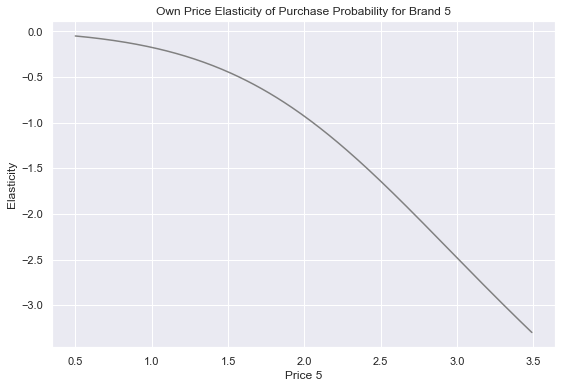

In [27]:
# Plot elasticities of purchase probability for brand 5.
plt.figure(figsize=(9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color='grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.show()

In [28]:
# Similarly, we can calculate price elasticity of differnt brands

4 - Cross Price Elasticity of Purchase Probability of Brand 5 Cross (wrt) Brand 4

In [29]:
# We want to examine the effect of the changes in price of a competitor brand.
# As we've discussed in the lecture, the brand which comes closest to our own brand is brand 4.
# Therefore, we need to examine changes in the price of this brand.
# Keep in mind, we could examine the cross price elasticities for any of the remaining brands,
# we just need to update this data frame accordingly to contain the respective brand.
df_brand5_cross_brand4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()
df_brand5_cross_brand4

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,3.45,2.654296
296,1.384559,1.764717,2.006694,3.46,2.654296
297,1.384559,1.764717,2.006694,3.47,2.654296
298,1.384559,1.764717,2.006694,3.48,2.654296


In [30]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)
predict_brand5_cross_brand4

array([[0.0099632 , 0.16384108, 0.00386848, 0.60919488, 0.21313236],
       [0.0101185 , 0.16488695, 0.00394198, 0.60674121, 0.21431135],
       [0.01027595, 0.16593504, 0.00401677, 0.60428117, 0.21549107],
       ...,
       [0.22460881, 0.24724387, 0.23613723, 0.04189243, 0.25011765],
       [0.22567698, 0.24616826, 0.2380573 , 0.04127868, 0.24881878],
       [0.22674091, 0.24508725, 0.2399831 , 0.04067226, 0.24751648]])

In [31]:
predict_brand5_cross_brand4.shape

(300, 5)

In [32]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]
pr_brand_4

array([0.60919488, 0.60674121, 0.60428117, 0.60181485, 0.59934236,
       0.59686379, 0.59437925, 0.59188883, 0.58939264, 0.58689078,
       0.58438336, 0.58187048, 0.57935226, 0.57682879, 0.57430018,
       0.57176656, 0.56922802, 0.56668468, 0.56413665, 0.56158405,
       0.55902699, 0.55646559, 0.55389996, 0.55133022, 0.54875648,
       0.54617888, 0.54359752, 0.54101253, 0.53842403, 0.53583213,
       0.53323697, 0.53063867, 0.52803734, 0.52543313, 0.52282614,
       0.5202165 , 0.51760435, 0.51498981, 0.512373  , 0.50975406,
       0.50713312, 0.50451029, 0.50188572, 0.49925952, 0.49663184,
       0.4940028 , 0.49137254, 0.48874118, 0.48610885, 0.48347569,
       0.48084183, 0.47820741, 0.47557254, 0.47293738, 0.47030204,
       0.46766667, 0.46503139, 0.46239634, 0.45976165, 0.45712746,
       0.45449389, 0.45186108, 0.44922917, 0.44659829, 0.44396856,
       0.44134013, 0.43871312, 0.43608767, 0.43346391, 0.43084197,
       0.42822199, 0.42560409, 0.4229884 , 0.42037506, 0.41776

In [33]:
price_coeff_brand_5

array([[-1.09]])

In [33]:
# In order to calculate the cross brand price elasticity, we need to use the new formula we introduced in the lecture.
# The elasticity is equal to negative the price coefficient of the own brand multiplied by the price of the cross brand,
# further multiplied by the probability for choosing the cross brand.

# cross_brand_pe = price_coeff_brand_5(own)** price_range * pr_brand_4
brand5_cross_brand4_price_elasticity = (-price_coeff_brand_5) * price_range * pr_brand_4
brand5_cross_brand4_price_elasticity

array([[0.33201114, 0.33728736, 0.34250649, 0.34766836, 0.35277283,
        0.35781976, 0.36280901, 0.36774045, 0.37261394, 0.37742938,
        0.38218663, 0.38688559, 0.39152616, 0.39610823, 0.40063171,
        0.40509651, 0.40950254, 0.41384972, 0.41813798, 0.42236726,
        0.42653749, 0.43064861, 0.43470058, 0.43869334, 0.44262687,
        0.44650112, 0.45031607, 0.4540717 , 0.45776799, 0.46140493,
        0.46498252, 0.46850076, 0.47195965, 0.47535922, 0.47869948,
        0.48198046, 0.48520219, 0.4883647 , 0.49146805, 0.49451228,
        0.49749745, 0.50042362, 0.50329085, 0.50609923, 0.50884884,
        0.51153975, 0.51417207, 0.51674589, 0.51926132, 0.52171846,
        0.52411744, 0.52645837, 0.52874139, 0.53096663, 0.53313423,
        0.53524433, 0.53729709, 0.53929268, 0.54123124, 0.54311295,
        0.54493799, 0.54670654, 0.54841879, 0.55007493, 0.55167515,
        0.55321966, 0.55470868, 0.55614242, 0.55752109, 0.55884492,
        0.56011416, 0.56132902, 0.56248977, 0.56

In [34]:
brand5_cross_brand4_price_elasticity.shape

(1, 300)

In [35]:
brand5_cross_brand4_price_elasticity = np.reshape(
    brand5_cross_brand4_price_elasticity, (300,1))

In [36]:
df_price_elasticities['Brand 5 Price Elasticity Cross Brand 4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Brand 5 Price Elasticity,Brand 5 Price Elasticity Cross Brand 4
0,-0.049642,0.332011
1,-0.051219,0.337287
2,-0.052826,0.342506
3,-0.054463,0.347668
4,-0.056131,0.352773
...,...,...
295,-3.234942,0.162235
296,-3.251106,0.160335
297,-3.267239,0.158449
298,-3.283339,0.156578


In [37]:
# df_price_elasticities['Brand 5 Price Elasticity Cross Brand 4'] => prob of choosing brand 5 if price of brand 4 is changed

In [38]:
price_range.shape

(300,)

In [39]:
own_price_elasticity_brand_5.shape

(300,)

In [40]:
own_price_elasticity_brand_5 = np.reshape(own_price_elasticity_brand_5, (300,))
own_price_elasticity_brand_5.shape

(300,)

In [41]:
brand5_cross_brand4_price_elasticity.shape

(300, 1)

In [42]:
brand5_cross_brand4_price_elasticity = np.reshape(brand5_cross_brand4_price_elasticity, (300,))
brand5_cross_brand4_price_elasticity.shape

(300,)

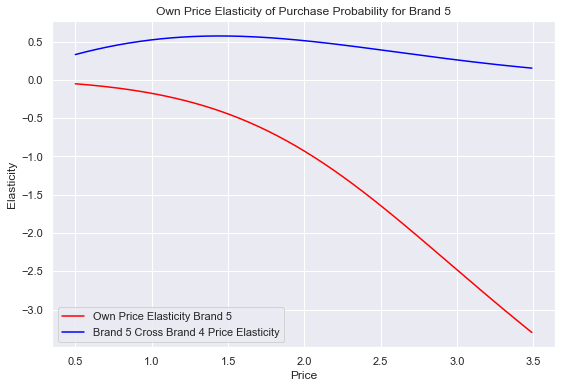

In [43]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color='red', label='Own Price Elasticity Brand 5')
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color='blue', label='Brand 5 Cross Brand 4 Price Elasticity')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')
plt.show()

5 - Own and Cross-Price Elasticity by Segment

5.1 - Segment 3 - Career Focused

In [44]:
# We are interested in analysing the purchase probability for choosing brand 5 by segments.
# We filter our data to contain only purchase incidences of the third segment - Well-off.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,3,0,0,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,3,0,0,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,3,0,0,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,3,0,0,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,3,0,0,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,3,0,0,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,3,0,0,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,3,0,0,0,1


In [45]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
Y

6        2
11       5
19       1
24       4
29       2
        ..
58621    2
58648    1
58674    2
58687    2
58691    2
Name: Brand, Length: 3110, dtype: int64

In [46]:
X = brand_choice_s3[features]
X

,Price_1,Price_2,Price_3,Price_4,Price_5
6,1.50,1.90,1.99,2.09,2.67
11,1.39,1.90,1.91,2.12,2.62
19,1.47,1.90,1.99,1.97,2.67
24,1.21,1.35,1.99,2.16,2.68
29,1.46,1.88,1.97,1.89,2.37
...,...,...,...,...,...
58621,1.48,1.89,2.01,2.18,2.69
58648,1.35,1.57,2.02,2.21,2.70
58674,1.50,1.85,2.06,2.24,2.79
58687,1.42,1.51,1.97,2.24,2.78


In [47]:
model_brand_choice_s3 = LogisticRegression(
    solver='sag', multi_class='multinomial', max_iter=300)
model_brand_choice_s3.fit(X, Y)

LogisticRegression(max_iter=300, multi_class='multinomial', solver='sag')

In [48]:
# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Prob_Brand_1,Prob_Brand_2,Prob_Brand_3,Prob_Brand_4,Prob_Brand_5
Coeff_Price_1,-3.06,1.47,0.74,0.34,0.51
Coeff_Price_2,0.74,-2.17,0.26,0.37,0.79
Coeff_Price_3,1.05,-0.30,0.56,-0.88,-0.43
Coeff_Price_4,0.85,-0.39,0.98,-1.06,-0.39
Coeff_Price_5,0.36,0.85,0.55,0.42,-2.18


5.1.1 - Own Price Elasticity of Purchase Probability for Brand 5 for Segment 3

In [49]:
# Calculating own-brand price elasticity for brand 5 and the Career-Focused segment.
df_own_brand_5_s3 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[:][:, 4]

own_price_elasticity_brand_5_s3 = (bc_coef.loc["Coeff_Price_5", "Prob_Brand_5"].to_numpy())* price_range * (1 - pr_own_brand_5_s3)

In [50]:
own_price_elasticity_brand_5_s3.shape

(1, 300)

In [51]:
df_price_elasticities.shape

(300, 2)

In [52]:
own_price_elasticity_brand_5_s3 = np.reshape(own_price_elasticity_brand_5_s3, (300,1))
own_price_elasticity_brand_5_s3.shape

(300, 1)

In [53]:
df_price_elasticities['Brand 5 PE Segment 3'] = own_price_elasticity_brand_5_s3
df_price_elasticities

,Brand 5 Price Elasticity,Brand 5 Price Elasticity Cross Brand 4,Brand 5 PE Segment 3
0,-0.049642,0.332011,-0.015315
1,-0.051219,0.337287,-0.016054
2,-0.052826,0.342506,-0.016821
3,-0.054463,0.347668,-0.017619
4,-0.056131,0.352773,-0.018447
...,...,...,...
295,-3.234942,0.162235,-7.401530
296,-3.251106,0.160335,-7.426364
297,-3.267239,0.158449,-7.451124
298,-3.283339,0.156578,-7.475812


5.1.2 - Cross Price Elasticity of Purchase Probability for Brand 5 Cross Brand 4 for Segment 3

In [54]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(
    df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[:][:, 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = (
    -((bc_coef.loc["Coeff_Price_5", "Prob_Brand_5"].to_numpy()))) * price_range * pr_cross_brand_5_s3

In [55]:
brand5_cross_brand4_price_elasticity_s3 = np.reshape(
    brand5_cross_brand4_price_elasticity_s3, (300, 1))
brand5_cross_brand4_price_elasticity_s3.shape

(300, 1)

In [56]:
df_price_elasticities['Brand 5 Price Elasticity Cross Brand 4 Segment 3'] = brand5_cross_brand4_price_elasticity_s3
df_price_elasticities

,Brand 5 Price Elasticity,Brand 5 Price Elasticity Cross Brand 4,Brand 5 PE Segment 3,Brand 5 Price Elasticity Cross Brand 4 Segment 3
0,-0.049642,0.332011,-0.015315,0.442468
1,-0.051219,0.337287,-0.016054,0.449418
2,-0.052826,0.342506,-0.016821,0.456296
3,-0.054463,0.347668,-0.017619,0.463101
4,-0.056131,0.352773,-0.018447,0.469833
...,...,...,...,...
295,-3.234942,0.162235,-7.401530,0.312795
296,-3.251106,0.160335,-7.426364,0.309577
297,-3.267239,0.158449,-7.451124,0.306376
298,-3.283339,0.156578,-7.475812,0.303191


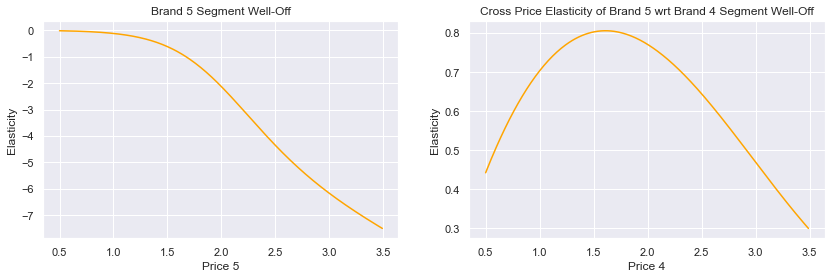

In [57]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color='orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color='orange')
axs[1].set_title(
    'Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel='Elasticity')

6 - Comparsion Plot

Text(0.5, 0, 'Price 4')

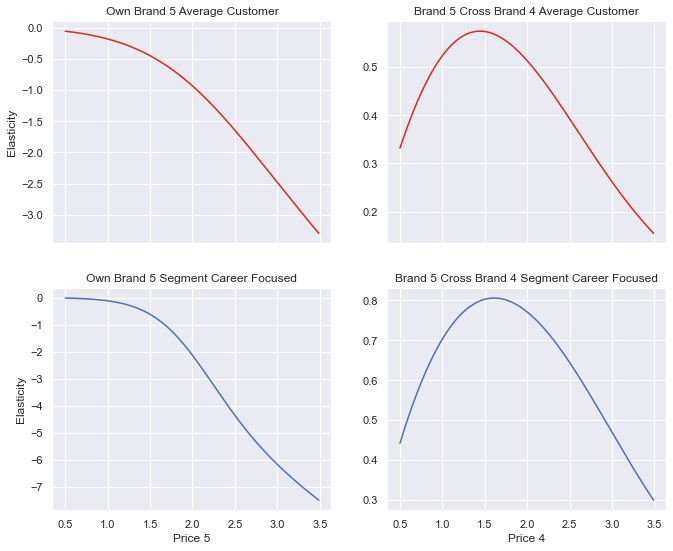

In [58]:
fig1, (ax1, ax2) = plt.subplots(
    2, 2, figsize=(11, 9), sharex=True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:red')
ax1[0].set_title('Own Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:red')
ax1[1].set_title('Brand 5 Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s3)
ax2[0].set_title('Own Brand 5 Segment Career Focused')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3)
ax2[1].set_title('Brand 5 Cross Brand 4 Segment Career Focused')

ax2[0].set_xlabel('Price 5')
ax2[1].set_xlabel('Price 4')

In [59]:
# Analysis
# |E| < 1 => inelastic => most loyal => if the price increases the customer will not diverge to other brands